<a href="https://colab.research.google.com/github/ADITYASINGH77770000/GenAI-Practicals/blob/main/Autoencoder_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

In [ ]:
# Load Dataset (MNIST HandWritten Digits)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normal pixel values to [0 , 1]
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [ ]:
# Flatten images from (28,28) to (784,)
x_train = x_train.reshape((len(x_train),28*28))
x_test = x_test.reshape((len(x_test),28*28))

In [ ]:
# Build Autoencoder model
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(64,activation="relu")(input_img)

In [ ]:
# Decoding layer (reconstructing data)
decoded = layers.Dense(784,activation="sigmoid")(encoded)

In [ ]:
# Combine into Autoencoder model
autoencoder = models.Model(input_img,decoded)

In [ ]:
# Compile model
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
# Train the autoencoder

history = autoencoder.fit(
    x_train,x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test,x_test)
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3491 - val_loss: 0.1605
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1515 - val_loss: 0.1268
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1232 - val_loss: 0.1088
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1071 - val_loss: 0.0978
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0967 - val_loss: 0.0905
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0901 - val_loss: 0.0857
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0856 - val_loss: 0.0820
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0820 - val_loss: 0.0794
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0798 - val_loss: 0.0777
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0781 - val_loss: 0.0764
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0769 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

In [ ]:
# Test Reconstruction
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


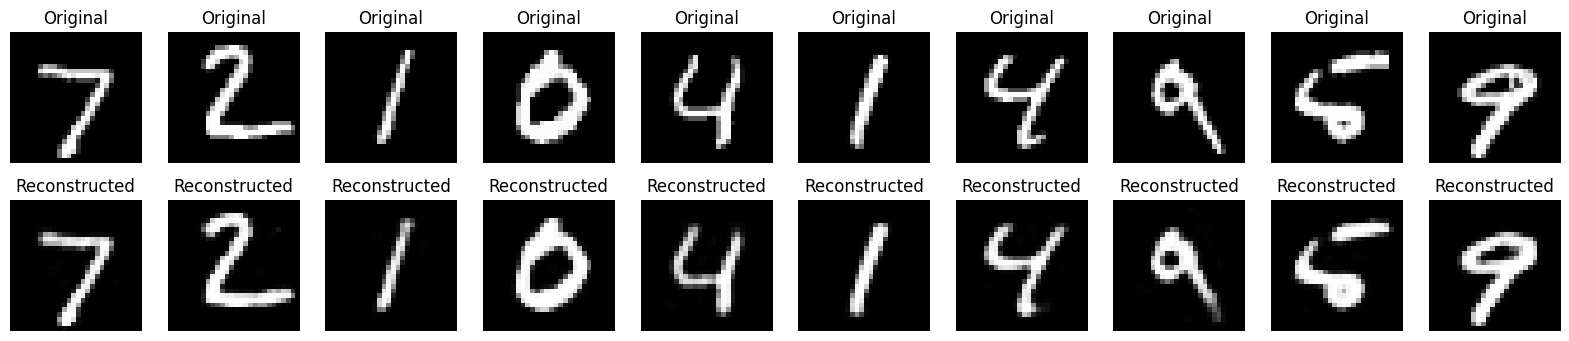

In [ ]:
# Vsulaize original vs reconstructed
n = 10  # how many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()